In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("globalmart_customer_segments_P3.csv")

print("Initial Shape:", df.shape)
df.head()


Initial Shape: (50000, 15)


,Customer_ID,Gender,Age,Annual_Income_K,Spending_Score,Total_Transactions,Avg_Basket_Value,Return_Rate,Preferred_Channel,Last_Purchase_Days,Category_Affinity,Discount_Sensitivity,Coupon_Usage,Membership_Years,Email_Open_Rate
0,C-8887907,Female,40,131,76,86,195.696132,0.102644,App,88,Home,0.493616,8,9,0.593057
1,C-6583655,Female,45,80,31,45,115.325699,0.279044,Web,27,Home,0.043273,12,1,0.331041
2,C-6405953,Male,46,79,41,49,41.833859,0.125947,Store,12,Home,0.834919,16,3,0.873822
3,C-2800850,Male,33,92,65,34,171.755358,0.163543,Store,24,Home,0.693914,0,4,0.574896
4,C-8342267,Female,32,118,95,87,167.046120,0.575175,Store,11,Home,0.227708,10,13,0.531845


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           50000 non-null  object 
 1   Gender                50000 non-null  object 
 2   Age                   50000 non-null  int64  
 3   Annual_Income_K       50000 non-null  int64  
 4   Spending_Score        50000 non-null  int64  
 5   Total_Transactions    50000 non-null  int64  
 6   Avg_Basket_Value      50000 non-null  float64
 7   Return_Rate           50000 non-null  float64
 8   Preferred_Channel     50000 non-null  object 
 9   Last_Purchase_Days    50000 non-null  int64  
 10  Category_Affinity     50000 non-null  object 
 11  Discount_Sensitivity  50000 non-null  float64
 12  Coupon_Usage          50000 non-null  int64  
 13  Membership_Years      50000 non-null  int64  
 14  Email_Open_Rate       50000 non-null  float64
dtypes: float64(4), int6

Customer_ID             0
Gender                  0
Age                     0
Annual_Income_K         0
Spending_Score          0
Total_Transactions      0
Avg_Basket_Value        0
Return_Rate             0
Preferred_Channel       0
Last_Purchase_Days      0
Category_Affinity       0
Discount_Sensitivity    0
Coupon_Usage            0
Membership_Years        0
Email_Open_Rate         0
dtype: int64

In [3]:
df = df.dropna()


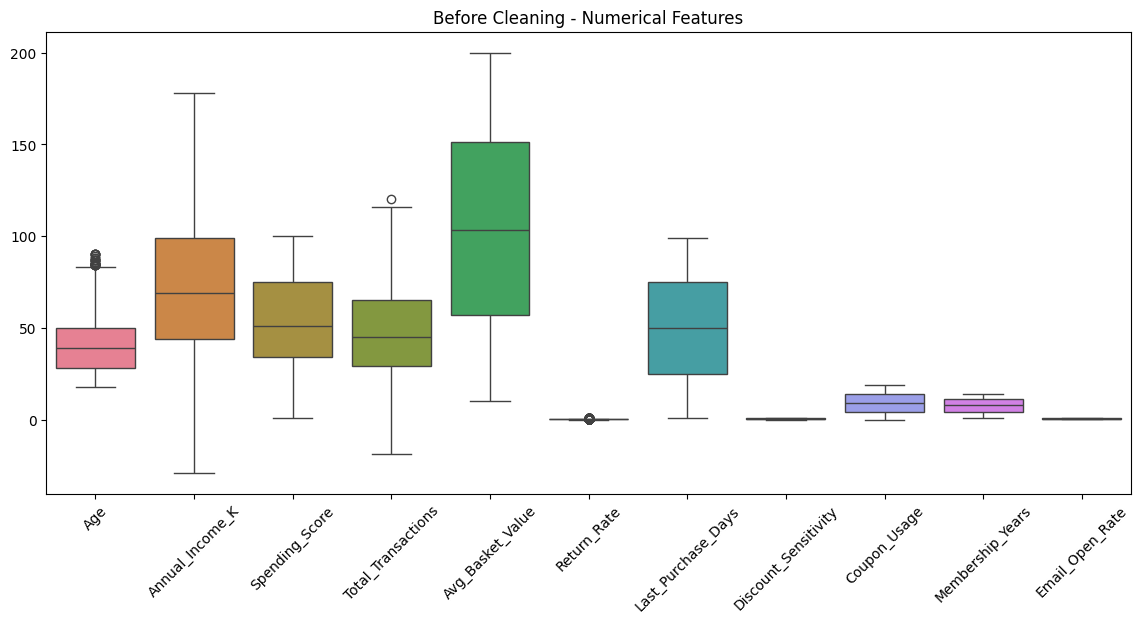

In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Before Cleaning - Numerical Features")
plt.show()


In [5]:
df = df[df["Annual_Income_K"] > 0]
df = df[df["Total_Transactions"] >= 0]
df = df[df["Return_Rate"] >= 0]
df = df[df["Discount_Sensitivity"].between(0,1)]
df = df[df["Email_Open_Rate"].between(0,1)]


In [6]:
print("After Cleaning Shape:", df.shape)


After Cleaning Shape: (49429, 15)


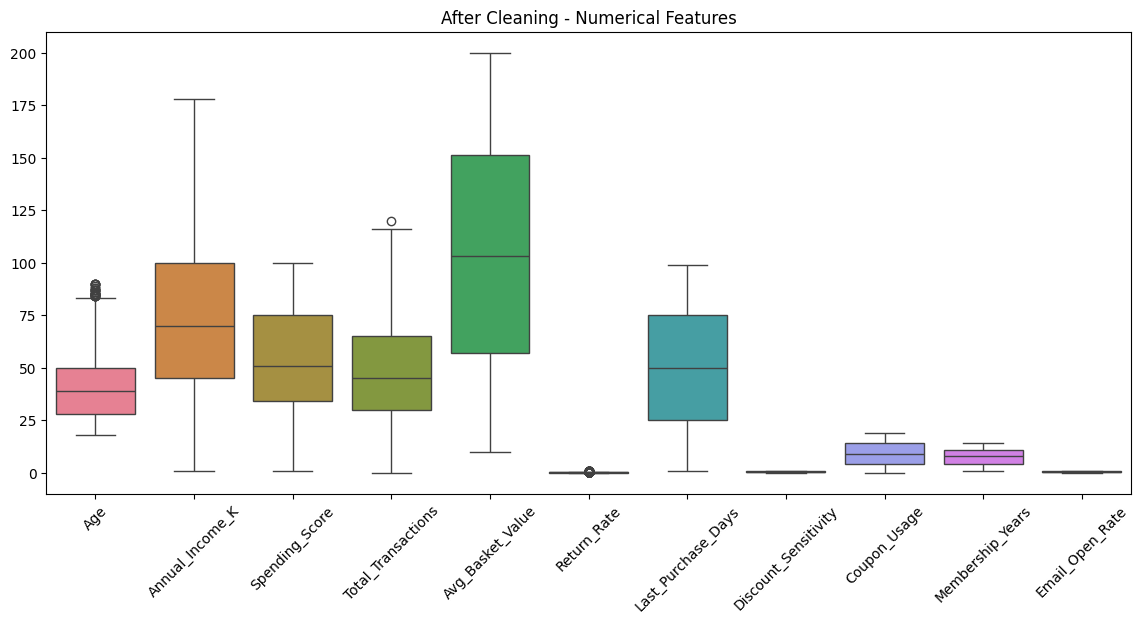

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("After Cleaning - Numerical Features")
plt.show()


In [8]:
df = df.drop("Customer_ID", axis=1)


In [9]:
categorical_cols = ["Gender", "Preferred_Channel", "Category_Affinity"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encoded Shape:", df_encoded.shape)


Encoded Shape: (49429, 16)


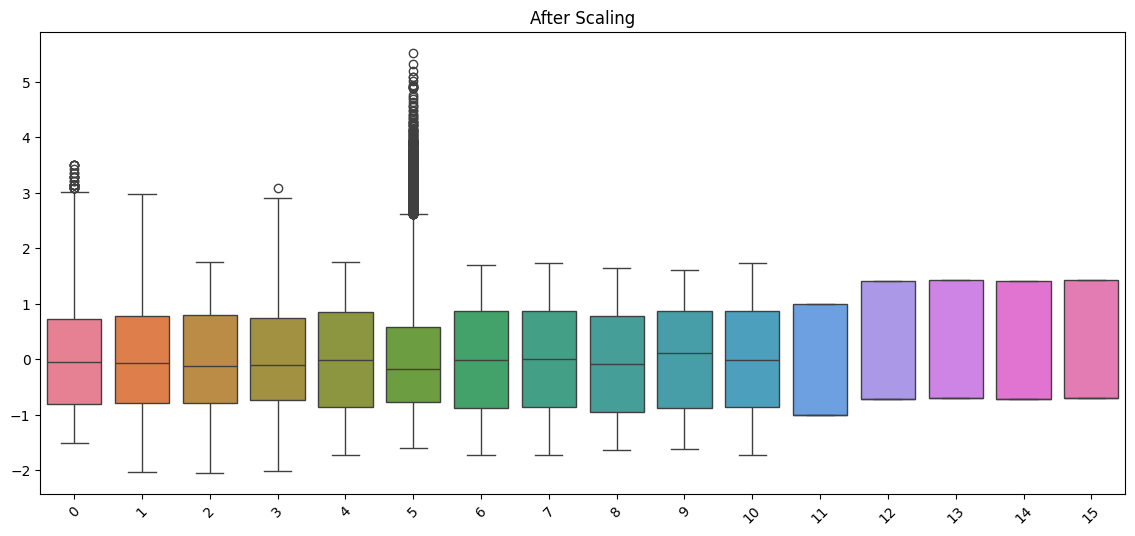

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=45)
plt.title("After Scaling")
plt.show()


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.16021453 0.09398005]
Total Variance Explained: 0.254194584055455


In [15]:
from sklearn.cluster import KMeans

inertia_scores = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia_scores.append(km.inertia_)


In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

print(cumulative_variance)


[0.16021453 0.25419458 0.34764933 0.41108739 0.47431679 0.53717867
 0.59993357 0.66230699 0.72440183 0.78622825 0.84787936 0.90756983
 0.9390503  0.97015695 0.98811047 1.        ]


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [18]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)


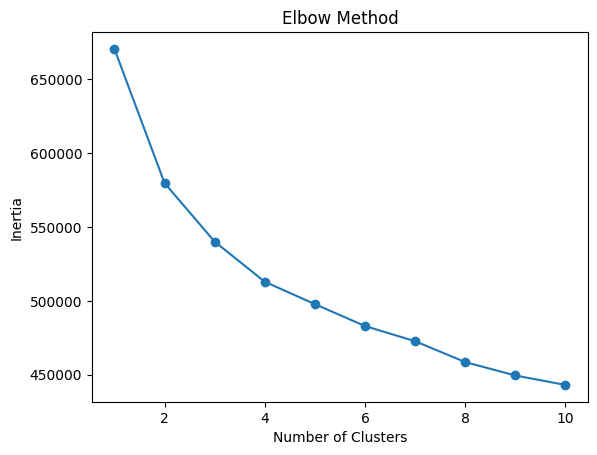

In [19]:
from sklearn.cluster import KMeans

inertia_scores = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia_scores.append(km.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1,11), inertia_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [20]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)


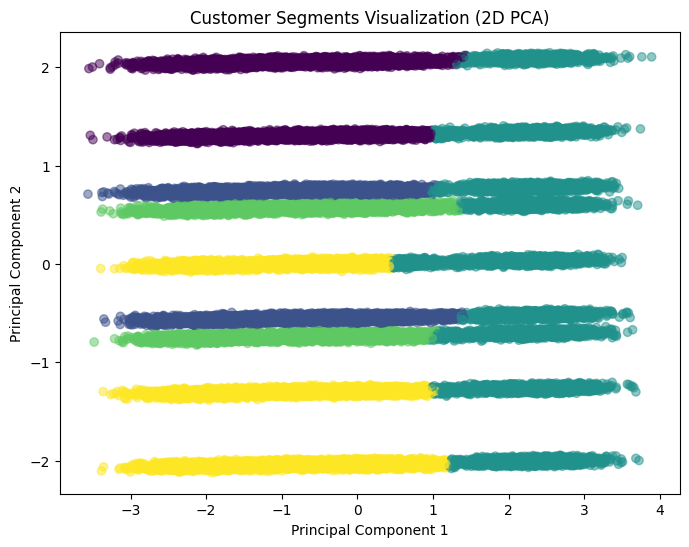

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=clusters, cmap='viridis', alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments Visualization (2D PCA)")
plt.show()


In [22]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df["Cluster"] = clusters


In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.09332246197994518


In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)   # Make sure this is same data
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette={score}")


k=2, silhouette=0.13537684173454606
k=3, silhouette=0.10089852091465183
k=4, silhouette=0.09332246197994518
k=5, silhouette=0.07971370473281703
k=6, silhouette=0.07342087742064796
k=7, silhouette=0.07339918387301372
k=8, silhouette=0.07844559820843464
k=9, silhouette=0.07702851233828481
k=10, silhouette=0.07260164877885583


In [25]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df["Cluster"] = clusters


In [27]:
df.groupby("Cluster").agg("mean", numeric_only=True)


,Age,Annual_Income_K,Spending_Score,Total_Transactions,Avg_Basket_Value,Return_Rate,Last_Purchase_Days,Discount_Sensitivity,Coupon_Usage,Membership_Years,Email_Open_Rate
Cluster,,,,,,,,,,,
0,33.746831,115.879979,86.566049,77.891606,105.263513,0.166209,50.372965,0.499896,9.467257,7.434176,0.499558
1,42.245518,56.512524,41.875461,35.683916,103.547229,0.167860,50.003814,0.500796,9.556262,7.536745,0.499112
2,41.512307,57.035956,43.016771,36.811897,104.325849,0.167307,50.131636,0.497444,9.421332,7.518822,0.501484
3,41.587003,56.632202,42.704553,36.305960,103.900033,0.166893,50.243957,0.499158,9.401987,7.579801,0.500811


In [28]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df["Cluster"] = clusters

df.groupby("Cluster").mean(numeric_only=True)


,Age,Annual_Income_K,Spending_Score,Total_Transactions,Avg_Basket_Value,Return_Rate,Last_Purchase_Days,Discount_Sensitivity,Coupon_Usage,Membership_Years,Email_Open_Rate
Cluster,,,,,,,,,,,
0,31.850831,106.114193,82.951752,73.166328,104.791394,0.166310,50.570130,0.497919,9.487265,7.487863,0.501154
1,43.668440,55.520992,39.680029,34.234596,103.938170,0.167482,49.985751,0.500446,9.464086,7.531297,0.499478


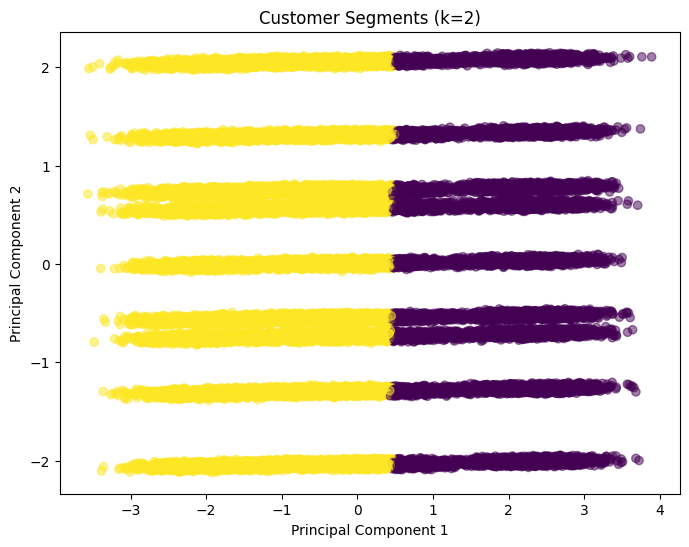

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], 
            c=df["Cluster"], cmap="viridis", alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments (k=2)")
plt.show()


In [30]:
df["Segment"] = df["Cluster"].map({
    0: "High-Value VIP",
    1: "Regular Customers"
})


In [31]:
final_summary = df.groupby("Segment").mean(numeric_only=True)
final_summary


,Age,Annual_Income_K,Spending_Score,Total_Transactions,Avg_Basket_Value,Return_Rate,Last_Purchase_Days,Discount_Sensitivity,Coupon_Usage,Membership_Years,Email_Open_Rate,Cluster
Segment,,,,,,,,,,,,
High-Value VIP,31.850831,106.114193,82.951752,73.166328,104.791394,0.166310,50.570130,0.497919,9.487265,7.487863,0.501154,0.0
Regular Customers,43.668440,55.520992,39.680029,34.234596,103.938170,0.167482,49.985751,0.500446,9.464086,7.531297,0.499478,1.0


In [32]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(kmeans, "kmeans.pkl")

print("Models saved successfully!")


Models saved successfully!


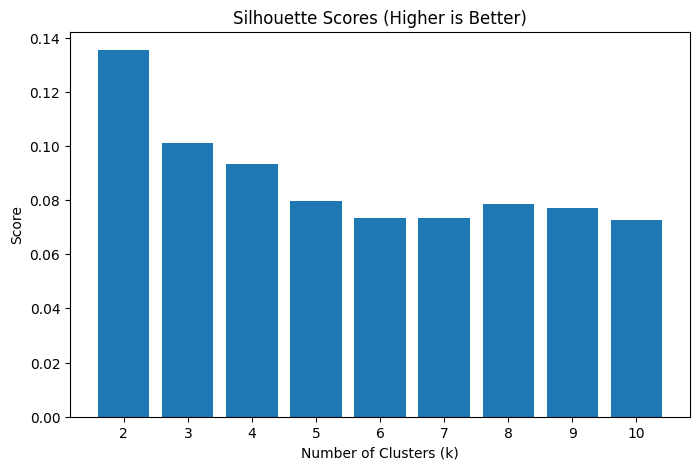

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)   # Use X_scaled if no PCA
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,5))
plt.bar(k_range, silhouette_scores)
plt.title("Silhouette Scores (Higher is Better)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.xticks(k_range)
plt.show()


In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


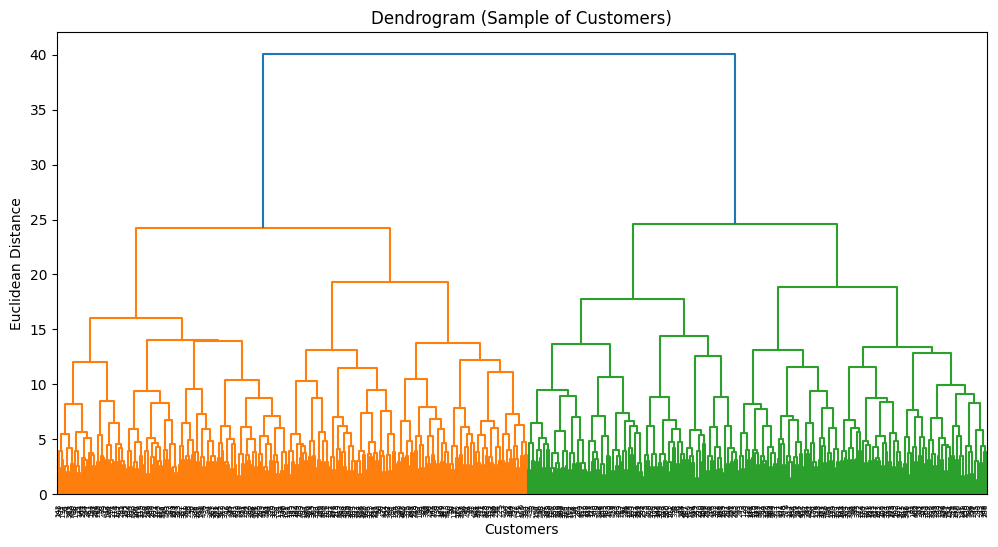

In [36]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Take random sample of 500 customers
sample_size = 500
indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[indices]

# Perform hierarchical clustering on sample
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Dendrogram (Sample of Customers)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [37]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Take sample
sample_size = 1000
indices = np.random.choice(len(df), sample_size, replace=False)

df_sample = df.iloc[indices]
X_sample = X_scaled[indices]   # Use scaled data


In [40]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hc.fit_predict(X_sample)


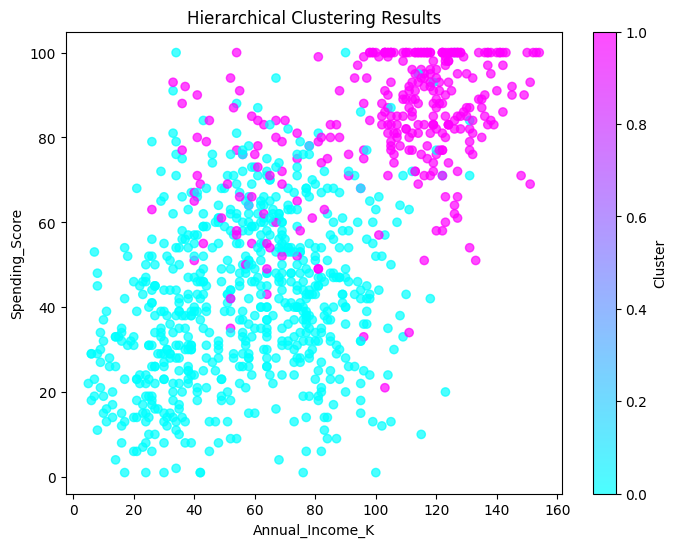

In [41]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_sample["Annual_Income_K"],
    df_sample["Spending_Score"],
    c=labels,
    cmap="cool",
    alpha=0.7
)

plt.xlabel("Annual_Income_K")
plt.ylabel("Spending_Score")
plt.title("Hierarchical Clustering Results")
plt.colorbar(label="Cluster")
plt.show()


In [42]:
# Group by Cluster and calculate averages (ORIGINAL DATA)
summary = df.groupby('Cluster')[[
    'Age',
    'Annual_Income_K',
    'Spending_Score',
    'Total_Transactions',
    'Avg_Basket_Value'
]].mean()

# Add count of customers in each cluster
summary['Count'] = df['Cluster'].value_counts()

print("===== FINAL CUSTOMER SEGMENTS (k=2) =====")
print(summary)


===== FINAL CUSTOMER SEGMENTS (k=2) =====
               Age  Annual_Income_K  Spending_Score  Total_Transactions  \
Cluster                                                                   
0        31.850831       106.114193       82.951752           73.166328   
1        43.668440        55.520992       39.680029           34.234596   

         Avg_Basket_Value  Count  
Cluster                           
0              104.791394  16726  
1              103.938170  32703  


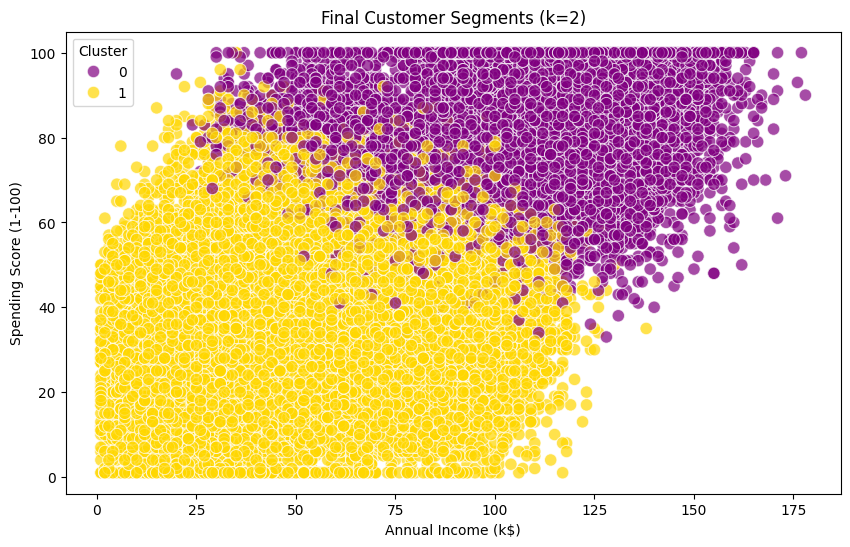


--- MARKETING RECOMMENDATIONS ---
Cluster 0: High Income & High Spend -> Premium Active Customers.
Target Strategy: Loyalty programs, VIP offers, premium campaigns.

Cluster 1: Lower Income & Lower Spend -> Conservative Customers.
Target Strategy: Discounts, cashback, value bundles.


In [44]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Annual_Income_K',
    y='Spending_Score',
    hue='Cluster',
    data=df,
    palette=['purple', 'gold'],
    s=80,
    alpha=0.7
)

plt.title("Final Customer Segments (k=2)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()



print("\n--- MARKETING RECOMMENDATIONS ---")

print("Cluster 0: High Income & High Spend -> Premium Active Customers.")
print("Target Strategy: Loyalty programs, VIP offers, premium campaigns.")

print("\nCluster 1: Lower Income & Lower Spend -> Conservative Customers.")
print("Target Strategy: Discounts, cashback, value bundles.")
